In [ ]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/best.pt')


In [ ]:
# Path to your video
video_path = "/content/WhatsApp Video 2025-04-28 at 18.49.06_18c794d2.mp4"

# Run prediction
results = model.predict(source=video_path, save=True, conf=0.4)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/4509) /content/WhatsApp Video 2025-04-28 at 18.49.06_18c794d2.mp4: 384x640 2 cars, 64.5ms
video 1/1 (frame 2/4509) /content/WhatsApp Video 2025-04-28 at 18.49.06_18c794d2.mp4: 384x640 2 cars, 10.8ms
video 1/1 (frame 3/4509) /content/WhatsApp Video 2025-04-28 at 18.49.06_18c794d2.mp4: 384x640 2 cars, 10.7ms
video 1/1 (frame 4/4509) /content/WhatsApp Video 2025-04-28 at 18.49.06_18c794d2.mp4: 384x640 2 cars, 10.7ms
video 1/1 (frame 5/4

In [ ]:
# No code provided to correct.  Assuming this is a shell command, it's syntactically correct as is.
# If this was intended to be python code, more context is required.
!runs/detect/predict/

/bin/bash: line 1: runs/detect/predict/: Is a directory


In [12]:

# Step 2: Import the YOLO module
from ultralytics import YOLO

# Step 3: Load your trained model
model = YOLO('/content/best.pt')

# Step 4: Run prediction on your input video
results = model.predict(
    source="/content/WhatsApp Video 2025-04-28 at 18.49.06_18c794d2.mp4",
    save=True,
    conf=0.3  # adjust confidence if needed
)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/4509) /content/WhatsApp Video 2025-04-28 at 18.49.06_18c794d2.mp4: 384x640 2 cars, 16.7ms
video 1/1 (frame 2/4509) /content/WhatsApp Video 2025-04-28 at 18.49.06_18c794d2.mp4: 384x640 2 cars, 12.4ms
video 1/1 (frame 3/4509) /content/WhatsApp Video 2025-04-28 at 18.49.06_18c794d2.mp4: 384x640 2 cars, 10.7ms
video 1/1 (frame 4/4509) /content/WhatsApp Video 2025-04-28 at 18.49.06_18c794d2.mp4: 384x640 2 cars, 10.7ms
video 1/1 (frame 5/4

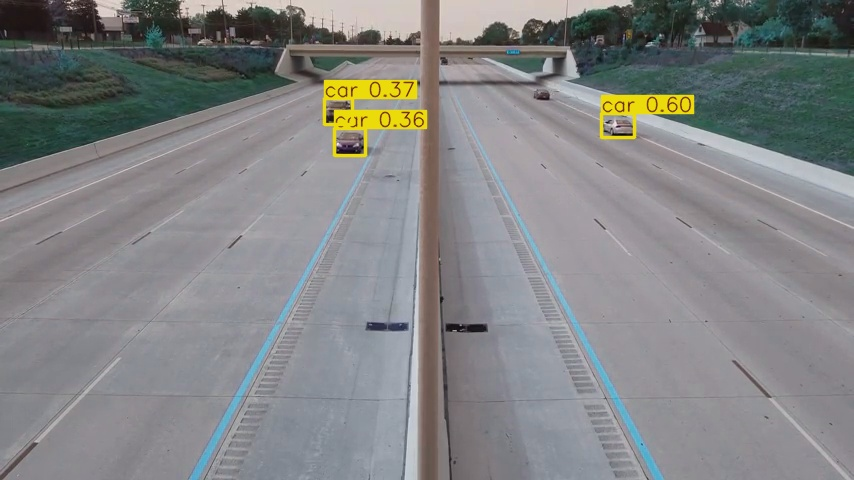

In [15]:
# STEP 1: Install YOLOv8 if not already installed
!pip install ultralytics

# STEP 2: Import libraries
from ultralytics import YOLO
import cv2
from IPython.display import display, Image, clear_output
import time

# STEP 3: Load model
model = YOLO("/content/best.pt")

# STEP 4: Input video path
video_path = "/content/WhatsApp Video 2025-04-28 at 18.49.06_18c794d2.mp4"
cap = cv2.VideoCapture(video_path)

# STEP 5: Get video properties
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

# STEP 6: Output video writer
out_path = "/content/output_with_predictions.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
out = cv2.VideoWriter(out_path, fourcc, fps, (width, height))

# STEP 7: Process video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(source=frame, conf=0.3, imgsz=640, verbose=False)
    annotated_frame = results[0].plot()

    out.write(annotated_frame)  # Save frame to output video

    # Optional: show preview in notebook
    rgb_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    _, img_encoded = cv2.imencode('.jpg', rgb_frame)
    clear_output(wait=True)
    display(Image(data=img_encoded.tobytes()))

    time.sleep(0.03)

cap.release()
out.release()


In [ ]:
# STEP 7: Process video frame by frame with a frame limit
max_frames = 100  # 🔴 Set the number of frames you want to process
frame_count = 0

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(source=frame, conf=0.3, imgsz=640, verbose=False)
    annotated_frame = results[0].plot()

    out.write(annotated_frame)

    rgb_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    _, img_encoded = cv2.imencode('.jpg', rgb_frame)
    clear_output(wait=True)
    display(Image(data=img_encoded.tobytes()))

    time.sleep(0.03)
    frame_count += 1  # 🔁 Count frames


In [1]:
from google.colab import files
files.download("/content/output_with_predictions.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# STEP 1: Install YOLOv8 and FFmpeg
!pip install -q ultralytics
!apt install -y ffmpeg

# STEP 2: Import required libraries
from ultralytics import YOLO
import cv2
from google.colab import files

# STEP 3: Load YOLO model
model = YOLO("/content/best.pt")

# STEP 4: Define input video path
video_path = "/content/WhatsApp Video 2025-04-28 at 18.49.06_18c794d2.mp4"
cap = cv2.VideoCapture(video_path)

# STEP 5: Get video properties
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

# STEP 6: Set output video path
output_raw = "/content/output_with_predictions_raw.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_raw, fourcc, fps, (width, height))

# STEP 7: Process video and add predictions
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    results = model.predict(source=frame, conf=0.3, imgsz=640, verbose=False)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)

cap.release()
out.release()

# STEP 8: Compress video using FFmpeg
compressed_output = "/content/output_with_predictions_compressed.mp4"
!ffmpeg -i {output_raw} -vcodec libx264 -crf 28 {compressed_output} -y

# STEP 9: Download the compressed video
files.download(compressed_output)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq -

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>